In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

df = pd.read_csv('dataset501.csv')
X = df[["channel frequency","description_contains_facebook","description_contains_instagram","title_contains_num","title_contains_special", "title_contains_brackets","title_length_normal", "tags_length_normal", "hour_normal", "stop_words_count_tags_normal" ]]
df_select_withlike = df[["daily_likes_normal","daily_dislikes_normal","daily_comment_count_normal","channel frequency","description_contains_facebook","description_contains_instagram","title_contains_num","title_contains_special", "title_contains_brackets","title_length_normal", "tags_length_normal", "hour_normal", "stop_words_count_tags_normal" ]]
y = df[["daily_views"]]


In [2]:
y = np.log(y + 1)
y

,daily_views
0,12.832514
1,14.005628
2,13.877369
3,12.052834
4,13.456802
5,10.995260
6,13.460463
7,12.515680
8,12.931276
9,11.761456


In [3]:
# kf = KFold(n_splits=10, shuffle = True)
# kf.get_n_splits(X)
# lm = LinearRegression()
# scores = cross_val_score(lm, X, y, cv=10, scoring="neg_mean_squared_error")
# print(scores)
# y = np.log(y)
# print(y)
reg = LassoCV(cv=10, random_state=0).fit(X, y.values.ravel())
print(reg.score(X, y))
print(reg.mse_path_.mean())
print(reg.coef_)
print(reg.intercept_)

0.1861059605355888
2.576671261491332
[ 2.26495011 -0.06040276  0.29257937  0.0832536   0.29464795  0.60252768
 -0.96889056  0.52155644 -0.43384354  0.07874878]
9.474848582550667


In [4]:
# # fix the sign of MSE scores
# mse_scores = -scores
# print(mse_scores.mean())

[12.83251362 14.00562831 13.87736924 ... 10.54765455 12.18178508
 12.78095417]


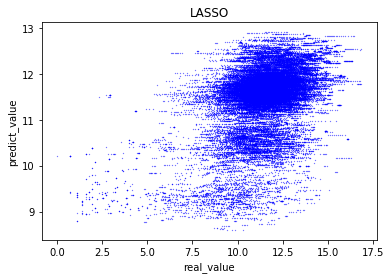

In [5]:
y_predit = reg.predict(X)
y_predit_list = y_predit.tolist()
# y_predit = y_predit.reshape(len(y_predit),1)
# y_predit.shape
y_train = y.values.reshape(len(y))
y_train_list = y_train.tolist()
print(y_train)
plt.xlabel("real_value")
plt.ylabel("predict_value")
plt.scatter(y_train_list, y_predit_list,c = 'b',s = 0.05)
plt.title('LASSO')
plt.show()